# Checking validity of dataset

In [3]:
def check_validity(dataset_folder, basename, matplotlib=True, debug=False):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib
    #Inside notebook uncomment the following
    matplotlib.rcsetup.interactive_bk
    plt.switch_backend('nbAgg')
    
    # Setting paths of the keyframe batch
    depth_gt_png = dataset_folder + basename + "depthGT.png"
    rgb_png = dataset_folder + basename + "rgb.png"
    sparse_depth_bin = dataset_folder + basename + "sparse_depth.bin"
    sparse_variance_bin = dataset_folder + basename + "sparse_depthVar.bin"
    
    # opening depth_gt and converting it to float
    print("GT depth---")
    depth_gt = cv2.imread(depth_gt_png, -1).astype(np.float32)/5000
    rgb = cv2.imread(rgb_png, -1)
    print("shape: ", depth_gt.shape)
    print("max: ", np.nanmax(depth_gt))
    print("dtype: ", depth_gt.dtype)
    
    # loading sparse idepth from bin (as half-float) and converting it to float32
    print("Sparse idepth ---")
    sparse_idepth = np.fromfile(sparse_depth_bin, dtype=np.float16)
    if(debug):
        print("min half-float sparse_idepth: ", np.nanmin(sparse_idepth))
        print("max half-float sparse_idepth: ", np.nanmax(sparse_idepth))
    sparse_idepth = sparse_idepth.astype(np.float32)
    sparse_idepth = sparse_idepth.reshape((480, 640))
    print("max: ", np.nanmax(sparse_idepth))
    print("shape: ",sparse_idepth.shape)
    print("dtype: ", sparse_idepth.dtype)
    
    # converting sparse idepth to depth
    print("Sparse depth ---")
    sparse_depth = 1./sparse_idepth
    print("max: ", np.nanmax(sparse_depth))
    print("shape: ", sparse_depth.shape)
    print("dtype: ", sparse_depth.dtype)
    
    # loading sparse idepthVar from bin (as half-float) and converting it to float32
    print("Sparse idepthVar ---")
    sparse_idepthVar = np.fromfile(sparse_variance_bin, dtype=np.float16)
    if(debug):
        print("min half-float sparse_idepthVar: ", np.nanmin(sparse_idepthVar))
        print("max half-float sparse_idepthVar: ", np.nanmax(sparse_idepthVar))
    sparse_idepthVar = sparse_idepthVar.astype(np.float32)
    sparse_idepthVar = sparse_idepthVar.reshape((480, 640))
    print("max: ", np.nanmax(sparse_idepthVar))
    print("shape: ", sparse_idepthVar.shape)
    print("dtype: ", sparse_idepthVar.dtype)
    
    # plotting images
    if matplotlib:
        # plot using matplotlib
        plt.figure("sparse_depth")
        plt.imshow(sparse_depth, cmap='hot')
        plt.clim(0,4)
        plt.colorbar()
        plt.figure("gt_depth")
        plt.imshow(depth_gt, cmap='hot')
        plt.clim(0,4)
        plt.colorbar()
        plt.figure("sparse_depth_variance")
        plt.imshow(sparse_idepthVar, cmap='hot')
        plt.figure("rgb")
        plt.imshow(rgb)
        plt.show()
    else:
        # plot using opencv
        sparse_plot = cv2.convertScaleAbs(sparse_depth*255./4.5)
        gt_plot = cv2.convertScaleAbs(depth_gt*255./4.5)
        cv2.imshow("sparse_depth", sparse_plot)
        cv2.imshow("gt_depth", gt_plot)
        cv2.imshow("rgb", rgb_gt)
        cv2.waitKey(0)

    
    if(debug):
        print("min depth_gt: ", np.nanmin(depth_gt))
        print("min sparse_idepth: ", np.nanmin(sparse_idepth))
        print("min sparse_depth: ", np.nanmin(sparse_depth))
        print("min sparse_idepthVar: ", np.nanmin(sparse_idepthVar))

GT depth---
shape:  (480, 640)
max:  3.5286
dtype:  float32
Sparse idepth ---
max:  13.2734375
shape:  (480, 640)
dtype:  float32
Sparse depth ---
max:  inf
shape:  (480, 640)
dtype:  float32
Sparse idepthVar ---
max:  0.06347656
shape:  (480, 640)
dtype:  float32


/misc/lmbraid19/thomasa/virtual-env/demon_venv/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


<IPython.core.display.Javascript object>


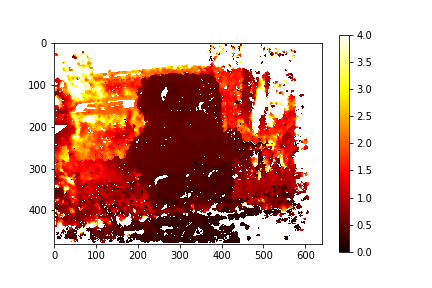

<IPython.core.display.Javascript object>


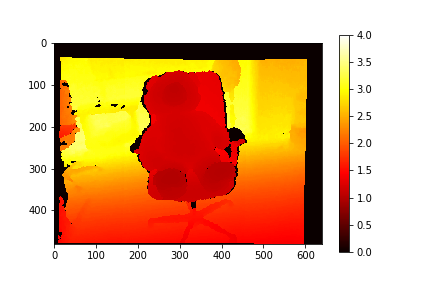

<IPython.core.display.Javascript object>


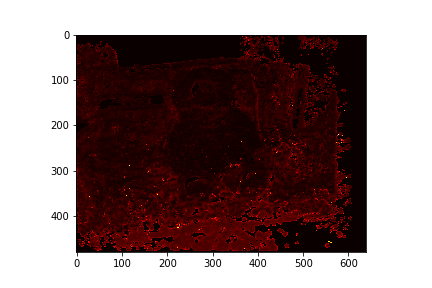

<IPython.core.display.Javascript object>


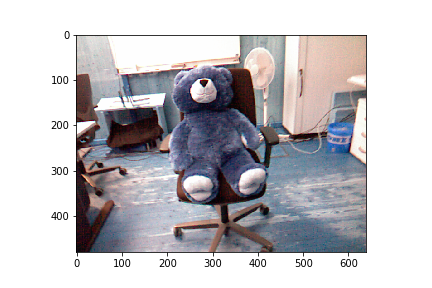

In [4]:
dataset_folder = "/misc/lmbraid19/thomasa/datasets/LSDDepthTraining/rgbd_dataset_freiburg1_teddy/"
basename = "0_1305032222.008934_171_"
check_validity(dataset_folder, basename)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcsetup.interactive_bk

In [ ]:
plt.switch_backend('nbAgg')

In [ ]:
dataset_folder = "/misc/lmbraid19/thomasa/datasets/LSDDepthTraining/rgbd_dataset_freiburg1_teddy/"
basename = "0_1305032227.075600_186_"
depth_gt_png = dataset_folder + basename + "depthGT.png"
rgb_png = dataset_folder + basename + "rgb.png"
sparse_depth_bin = dataset_folder + basename + "sparse_depth.bin"
sparse_variance_bin = dataset_folder + basename + "sparse_depthVar.bin"

In [ ]:
depth_gt = cv2.imread(depth_gt_png, -1).astype(np.float32)/5000
#depth_gt = cv2.imread(depth_gt_png, -1)
rgb_gt = cv2.imread(rgb_png, -1)
idepth_gt = 1./depth_gt


In [ ]:
print(depth_gt.shape)
print(np.nanmax(depth_gt))
print(np.nanmin(depth_gt))
print(depth_gt.dtype)

In [ ]:
print(idepth_gt.shape)
print(np.nanmax(idepth_gt))
print(np.nanmin(idepth_gt))
print(idepth_gt.dtype)

In [ ]:
sparse_idepth = np.fromfile(sparse_depth_bin, dtype=np.float16)
print(np.nanmax(sparse_idepth))
print(np.nanmin(sparse_idepth))

In [ ]:
sparse_idepth = sparse_idepth.astype(np.float32)
sparse_idepth = sparse_idepth.reshape((480, 640))
print(np.nanmax(sparse_idepth))
print(np.nanmin(sparse_idepth))
print(sparse_idepth.shape)
print(sparse_idepth.dtype)

In [ ]:
sparse_depth = 1./sparse_idepth
print(np.nanmax(sparse_depth))
print(np.nanmin(sparse_depth))
print(sparse_depth.shape)
print(sparse_depth.dtype)

In [ ]:
sparse_idepthVar = np.fromfile(sparse_variance_bin, dtype=np.float16)
print(np.nanmax(sparse_idepthVar))
print(np.nanmin(sparse_idepthVar))
sparse_idepthVar = sparse_idepthVar.astype(np.float32)
sparse_idepthVar = sparse_idepthVar.reshape((480, 640))
print(np.nanmax(sparse_idepthVar))
print(np.nanmin(sparse_idepthVar))
print(sparse_idepthVar.shape)
print(sparse_idepthVar.dtype)

In [ ]:
sparse_plot = cv2.convertScaleAbs(sparse_depth*255./4.5)
gt_plot = cv2.convertScaleAbs(depth_gt*255./4.5)
# plot using matplotlib
plt.figure()
plt.imshow(sparse_depth, cmap='hot')
plt.clim(0,4)
plt.colorbar()
plt.figure()
plt.imshow(depth_gt, cmap='hot')
plt.clim(0,4)
plt.colorbar()
plt.show()
"""
# plot using opencv
cv2.imshow("sparse_depth", sparse_plot)
cv2.imshow("gt_depth", gt_plot)
cv2.imshow("rgb", rgb_gt)
cv2.waitKey(0)
"""

In [ ]:
fig,ax = plt.subplots()
cax = plt.imshow(sparse_idepthVar, cmap='hot')
cbar = fig.colorbar(cax)
plt.show()

In [ ]:
original_depth = "/misc/lmbraid19/thomasa/datasets/rgbd/rgbd_dataset_freiburg1_teddy/depth/1305032182.042220.png"
depth_org = cv2.imread(original_depth, -1)
print(depth_org.max())
print(depth_org.min())
depth_org.dtype